<h3 align = 'center'><font color='purple'> Exploring the Bosch Production Line Dataset</font></h3>

### Introduction

This dataset is published via kaggle for their Bosch Production Line Performance competition. The objective of the competition is to classify a part (produced on a production line) as passing quality control (response = 1) or failing quality control (response = 0) given a bunch of measurements made on the part during the production process prior to being screened for quality. Pretty straight forward stuff.

the amount of data is -euge, there are quite a few csv's that make up this dataset and each of them are several GB. First things, first lets try and import the data.

In [ ]:
import pandas as pd
import os
curdur = os.getcwd()
os.chdir(curdur)
trainNumeric = pd.read_csv('train_numeric.csv')
trainCategorical = pd.read_csv('train_categorical.csv')
trainDate = pd.read_csv('train_date.csv')

Okay already a problem.... 2gb csv files do not import very quickly... I don't even have enough memory to hold all this data. A more powerful computer probably could do the trick?

So part of the challenge of this problem is determining which features are valuable. Hopefully, i'll find the features that matter, exclude the rest of the data and the result will be a dataframe that I can keep in memory easily. It's not clear if this is data for one specific part or if these are measurements that generalize to a class of parts etc. Either way, my hope is that what is being measured is consistent for every row in the dataset.

I usually don't want to start with feature importance but i'm pretty desperate to trim down this data.

Maybe this goes without saying but my goal is to retain the distribution of each predictor and the response through my sampling of rows so uniformly sampling rows from the dataset should work fine.

### Feature Selection (Train Numeric)

In [101]:
import pandas as pd
import random
n = sum(1 for line in open('train_numeric.csv')) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv('train_numeric.csv', skiprows=skip)

In [102]:
sum(df['Response'].values)
df.shape
df.dropna(axis=0)

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response


Okay a bit of a problem here, there are no columns without NAN's. Lets see where all the nans are coming from and try to cut them out without losing too much data.

In [103]:
print(df.isnull().sum()[:10])
# ah this is not good, looks like most datapoints are missing for most of these variables.
#lets just do a simple mean replacement for these, although im sure this is hurting the
df = df.fillna(df.mean())

Id              0
L0_S0_F0     4310
L0_S0_F2     4310
L0_S0_F4     4310
L0_S0_F6     4310
L0_S0_F8     4310
L0_S0_F10    4310
L0_S0_F12    4310
L0_S0_F14    4310
L0_S0_F16    4310
dtype: int64


In [104]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
X = df.drop('Response',1)
X = X.drop('Id',1)
Y = df['Response']
randomForest = RandomForestClassifier(n_estimators = 1000)
randomForest.fit(X,Y)
importances = randomForest.feature_importances_
sortedImportance = np.argsort(importances)

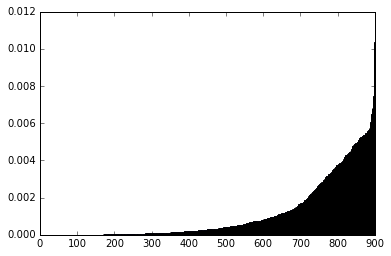

In [105]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.bar(range(900),importances[sortedImportance[len(importances)-900:]])
plt.show()


So it seems like the top 20 just iterate randomly based on the random generation of the forest. But the top 10 of 1 random forest never drop below like 100 for any other random forest

In [44]:
potentiallyGoodPredictors = X.columns.values[sortedImportance[len(importances)-100:]]
print(potentiallyGoodPredictors[:10])

['L3_S30_F3709' 'L0_S10_F219' 'L0_S0_F10' 'L3_S35_F3889' 'L3_S49_F4231'
 'L0_S3_F80' 'L3_S29_F3421' 'L3_S30_F3579' 'L3_S30_F3794' 'L0_S0_F12']


Lets do some PCA

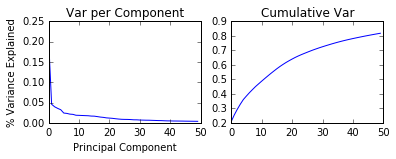

In [56]:
from sklearn.decomposition import PCA
analysis = PCA(n_components=50)
analysis.fit(X)
explainedVar = analysis.explained_variance_ratio_
plt.subplot(223)
plt.plot(range(50),explainedVar)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Var per Component')
plt.subplot(224)
plt.plot(range(50),np.cumsum(explainedVar))
plt.title('Cumulative Var')

In [36]:
weightIntensity = abs(analysis.components_[0])
sortedVariables = np.argsort(weightIntensity)
strongestPredictors = weightIntensity[sortedVariables]

In [50]:
otherPotentiallyImportantPredictors = X.columns[sortedVariables][len(sortedVariables)-100:]
print(otherPotentiallyImportantPredictors[len(otherPotentiallyImportantPredictors)-10:])

Index(['L3_S29_F3455', 'L3_S29_F3339', 'L3_S30_F3749', 'L0_S8_F144',
       'L3_S29_F3458', 'L3_S29_F3351', 'L3_S29_F3412', 'L3_S29_F3407',
       'L3_S29_F3470', 'L3_S29_F3464'],
      dtype='object')


In [55]:
#lets see how much agreement our two methods have
len([e for e in otherPotentiallyImportantPredictors if e not in '\n'.join(potentiallyGoodPredictors)])

47

A decent amount of agreement between methods. Seems like using the top few hundred predictors could be a viable option. Alternately I could try PCA on all the data and only use the top say 10 principal components as predictors. I think its worth trying both techniques and seeing what scores I end up with on kaggle and choosing the highest scoring method.

### Feature Selection (Train Categorical)

----

In [111]:
import random
import pandas as pd
nrows = 10000
trainCategorical = pd.read_csv('train_categorical.csv',skiprows =skip,low_memory=False)

In [112]:
sum(trainCategorical.isnull().sum() == 10000)
# so many NA values lets just drop the columns with all NA's

1357

In [113]:
NACols = trainCategorical.columns[(trainCategorical.isnull().sum() == 10000)==True]
trainCategorical = trainCategorical.drop(NACols,1)
trainCategorical = trainCategorical.drop('Id',1)

Lets convert all the categories to numbers

In [117]:
for predictor in list(trainCategorical.columns.values):
    uniqueVals = trainCategorical[predictor].unique()
    trainCategorical[predictor] = trainCategorical[predictor].replace(uniqueVals,range(0,len(uniqueVals)))

In [118]:
trainCategorical[:10]

,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,L0_S2_F43,L0_S2_F45,L0_S2_F47,L0_S2_F49,L0_S2_F51,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
from sklearn.ensemble import RandomForestClassifier
cateForest= RandomForestClassifier(n_estimators = 100)
cateForest.fit(trainCategorical,Y)
importances = cateForest.feature_importances_

<Container object of 100 artists>

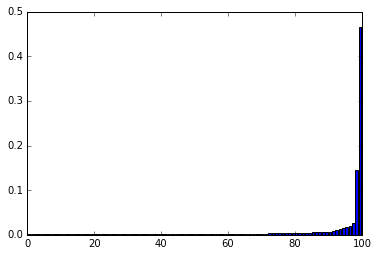

In [123]:
sortedImportances = np.argsort(importances)
plt.bar(range(0,100),importances[sortedImportances[len(importances)-100:]])

In [125]:
trainCategorical.columns[sortedImportances[len(importances)-10:]]

Index(['L0_S9_F204', 'L0_S9_F179', 'L0_S9_F159', 'L0_S9_F199', 'L1_S24_F710',
       'L2_S26_F3099', 'L1_S24_F705', 'L1_S24_F675', 'L3_S32_F3851',
       'L3_S32_F3854'],
      dtype='object')

And again lets do PCA.

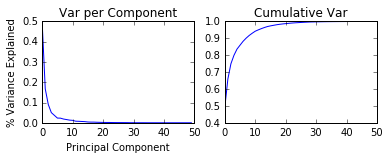

In [131]:
from sklearn.decomposition import PCA
analysis = PCA(n_components=50)
analysis.fit(trainCategorical)
explainedVar = analysis.explained_variance_ratio_
plt.subplot(223)
plt.plot(range(50),explainedVar)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Var per Component')
plt.subplot(224)
plt.plot(range(50),np.cumsum(explainedVar))
plt.title('Cumulative Var')

Again it seems clear that the majority of the predictive value lies in the best few predictors. I'll play with cutoff points next time but a good start might be say 8 or 20. 